In [171]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.special import softmax
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Can Denmark or Europe be powered by solar, wind and batteries?

Back of the envelope

![](https://solargis.com/file?url=download/World/World_GHI_mid-size-map_160x95mm-300dpi_v20191015.png&bucket=globalsolaratlas.info)

In [2]:
# https://en.wikipedia.org/wiki/European_countries_by_electricity_consumption_per_person
annual_kwh_per_capita = 5_859.0  # 
# https://www.google.com/search?q=population+in+europe
pop_size = 5_857_000
# https://www.solcelleguiden.dk/kwp-kilo-watt-peak-forklaring/
annual_kwh_per_pv_1kw = 1_000.0
# https://energielektrikeren.dk/product/solcelleanlaeg-3kw/
m2_per_pv_1kw = 4.6
# https://energielektrikeren.dk/product/solcelleanlaeg-3kw/
industri_rabat = 0.25
dkk_per_pv_1kw = 10_0000.0 * industri_rabat

In [5]:
kwh_per_km2 = annual_kwh_per_pv_1kw*m2_per_pv_1kw*1000**2
kwh_danmark = annual_kwh_per_capita * pop_size
pv_1kw_per_cap = annual_kwh_per_capita / annual_kwh_per_pv_1kw
m2_per_cap = m2_per_pv_1kw * pv_1kw_per_cap
m2_pv_danmark = m2_per_cap * pop_size
km2_pv_danmark = m2_pv_danmark / 1_000_000
pv_1kw_danmark = kwh_danmark / annual_kwh_per_pv_1kw
dkk_danmark = dkk_per_pv_1kw * pv_1kw_danmark

print('kWh per kvadratkilometer sol:', kwh_per_km2, 'kWh')
print('Årlige kWh hele Danmark:', kwh_danmark, 'kWh')
print('Areal (Danmark):', np.round(km2_pv_danmark), 'km2')
print('Areal sidelængde (Danmark):', np.round(np.sqrt(km2_pv_danmark)), 'km')
print('DKK (Danmark):', dkk_danmark, 'DKK')
print('DKK 30 år (Danmark):', dkk_danmark / 30, 'DKK/år')
print('Areal (per capita):', np.round(m2_per_cap), 'm2')


kWh per kvadratkilometer sol: 4600000000.0 kWh
Årlige kWh hele Danmark: 34316163000.0 kWh
Areal (Danmark): 158.0 km2
Areal sidelængde (Danmark): 13.0 km
DKK (Danmark): 857904075000.0 DKK
DKK 30 år (Danmark): 28596802500.0 DKK/år
Areal (per capita): 27.0 m2


In [12]:
(annual_kwh_per_pv_1kw * (1_000_000 / m2_per_pv_1kw)) / 1000**3
#annual_kwh_per_pv_1kw / 1000**3

0.21739130434782614

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.038, 0.126, 0.225, 0.251, 0.213, 0.119, 0.019, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.056,
        0.169, 0.277, 0.328, 0.336, 0.32 , 0.26 , 0.162, 0.041, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005, 0.068, 0.202,
        0.333, 0.439, 0.504, 0.512, 0.455, 0.357, 0.234, 0.126, 0.024,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.007, 0.057, 0.183, 0.333,
        0.463, 0.549, 0.575, 0.543, 0.523, 0.451, 0.337, 0.214, 0.087,
        0.015, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.005, 0.047, 0.126, 0.276, 0.438,
        0.571, 0.655, 0.679, 0.646, 0.623, 0.54 , 0.414, 0.282, 0.143,
        0.054, 0.009, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ,

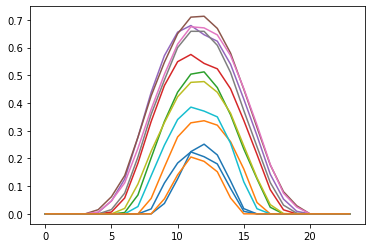

In [178]:
def pv_hourly_output(month=1, day=15):
    df = pd.read_csv('../data/pvwatts.csv')
    max_val = df['AC System Output (W)'].max()
    
    hourly = (
        df[df.Month == month]
        .groupby('Hour')['AC System Output (W)']
        .mean()
    )
#    hourly = (
#        df[(df.Month == month) & (df.Day==day)]
#        .sort_values(by='Hour')['AC System Output (W)']
#    )
    
    return hourly / max_val
    
#    X = np.arange(from_hour, to_hour)
#    Y = df['AC System Output (W)'] / df['AC System Output (W)'].max()
#    Y = Y.iloc[X]
#    return X, Y

means_by_month = []
for month in range(1,13):
    X = np.arange(24)
    Y = pv_hourly_output(month=month)
    means_by_month.append(Y)
    plt.plot(X, Y)
np.array(means_by_month).round(3)

In [148]:
def consumption():
    df = pd.read_csv('../data/nordpool_21_22.csv', parse_dates=['HourUTC', 'HourDK', 'Date'])
    Y = df.groupby('Hour').SpotPriceDKK.mean()
    return Y / Y.sum()

consumption().values

array([0.03529578, 0.03315591, 0.03214982, 0.03167976, 0.03195537,
       0.0342873 , 0.04257203, 0.0500294 , 0.0525266 , 0.04836528,
       0.04389886, 0.04096723, 0.03785774, 0.03547746, 0.0345392 ,
       0.03643008, 0.04011653, 0.0476938 , 0.05329773, 0.05576439,
       0.05228627, 0.04783387, 0.0438787 , 0.0379409 ])

In [149]:
pd.read_csv('../data/pvwatts.csv')

,Month,Day,Hour,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,7.0,11.3,0.0,7,0.0,0.0
1,1,1,1,0,0,7.1,12.7,0.0,7,0.0,0.0
2,1,1,2,0,0,7.2,14.0,0.0,7,0.0,0.0
3,1,1,3,0,0,7.4,15.4,0.0,7,0.0,0.0
4,1,1,4,0,0,7.6,15.4,0.0,8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,19,0,0,5.9,11.6,0.0,6,0.0,0.0
8756,12,31,20,0,0,6.3,12.0,0.0,6,0.0,0.0
8757,12,31,21,0,0,6.6,12.3,0.0,7,0.0,0.0
8758,12,31,22,0,0,6.8,12.0,0.0,7,0.0,0.0
